<a href="https://colab.research.google.com/github/deisanchezh/proyecto_tech/blob/main/TP1/Ubicacion_BS_Militares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Instalar librerías necesarias
!pip install pandas folium openpyxl

import pandas as pd
import folium
from folium.plugins import HeatMap

# Leer el archivo Excel
file_name = 'Ubicacion_Bases_Militares.xlsx'
df = pd.read_excel(file_name, sheet_name='Hoja1', header=1)

# Renombrar columnas para uniformidad
column_names = {
    'Nombre de la Unidad': 'Unidad',
    'Ubicación (Ciudad, Departamento)': 'Ubicacion',
    'Latitud (Aprox.)': 'Latitud',
    'Longitud (Aprox.)': 'Longitud',
    'Fuente': 'Fuente'
}

# Crear listas para cada fuerza militar
ejercito = df.iloc[:, 0:5].dropna(subset=['Nombre de la Unidad'])
armada = df.iloc[:, 5:10].dropna(subset=['Nombre de la Unidad.1'])
aerea = df.iloc[:, 10:15].dropna(subset=['Nombre de la Unidad.2'])

# Renombrar columnas y combinar datos
ejercito = ejercito.rename(columns={
    'Nombre de la Unidad': 'Unidad',
    'Ubicación (Ciudad, Departamento)': 'Ubicacion',
    'Latitud (Aprox.)': 'Latitud',
    'Longitud (Aprox.)': 'Longitud',
    'Fuente': 'Fuente'
})
armada = armada.rename(columns={
    'Nombre de la Unidad.1': 'Unidad',
    'Ubicación (Ciudad, Departamento).1': 'Ubicacion',
    'Latitud (Aprox.).1': 'Latitud',
    'Longitud (Aprox.).1': 'Longitud',
    'Fuente.1': 'Fuente'
})
aerea = aerea.rename(columns={
    'Nombre de la Unidad.2': 'Unidad',
    'Ubicación (Ciudad, Departamento).2': 'Ubicacion',
    'Latitud (Aprox.).2': 'Latitud',
    'Longitud (Aprox.).2': 'Longitud',
    'Fuente.2': 'Fuente'
})

# Combinar todos los datos
full_df = pd.concat([ejercito, armada, aerea], ignore_index=True)

# Función para convertir coordenadas a float
def convert_coord(coord):
    if isinstance(coord, str):
        return float(coord.split('°')[0].strip())
    return coord

# Convertir coordenadas
full_df['Latitud'] = full_df['Latitud'].apply(convert_coord)
full_df['Longitud'] = full_df['Longitud'].apply(convert_coord)

# Filtrar datos inválidos
full_df = full_df.dropna(subset=['Latitud', 'Longitud'])

# Crear mapa de calor
colombia_map = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Añadir capa de calor
heat_data = [[row['Latitud'], row['Longitud']] for _, row in full_df.iterrows()]
HeatMap(heat_data, radius=20, blur=15).add_to(colombia_map)

# Añadir marcadores
for _, row in full_df.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"{row['Unidad']} - {row['Ubicacion']}",
        icon=folium.Icon(color='red', icon='flag')
    ).add_to(colombia_map)

# Mostrar mapa
colombia_map

In [16]:
# CÓDIGO CORRECTO
df_2dhist = pd.crosstab(
    index=full_df['Ubicacion'],
    columns=full_df['Unidad']
)

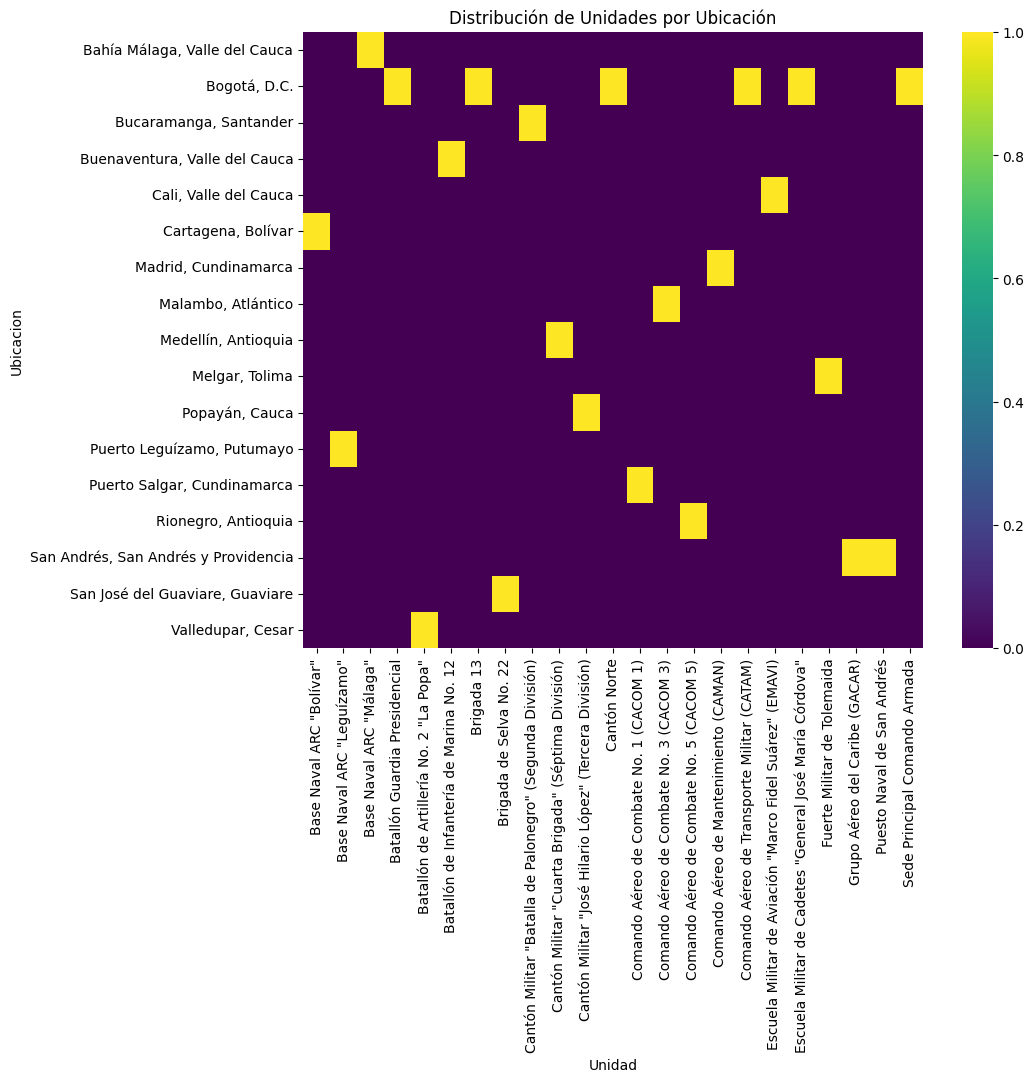

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una tabla de frecuencia limpia
df_2dhist = pd.crosstab(
    index=full_df['Ubicacion'],
    columns=full_df['Unidad']
)

# Genera el heatmap
plt.figure(figsize=(10, 8)) # Usar plt.figure es un poco más estándar
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Unidad')
plt.ylabel('Ubicacion')
plt.title('Distribución de Unidades por Ubicación') # Es buena práctica añadir un título
plt.show()

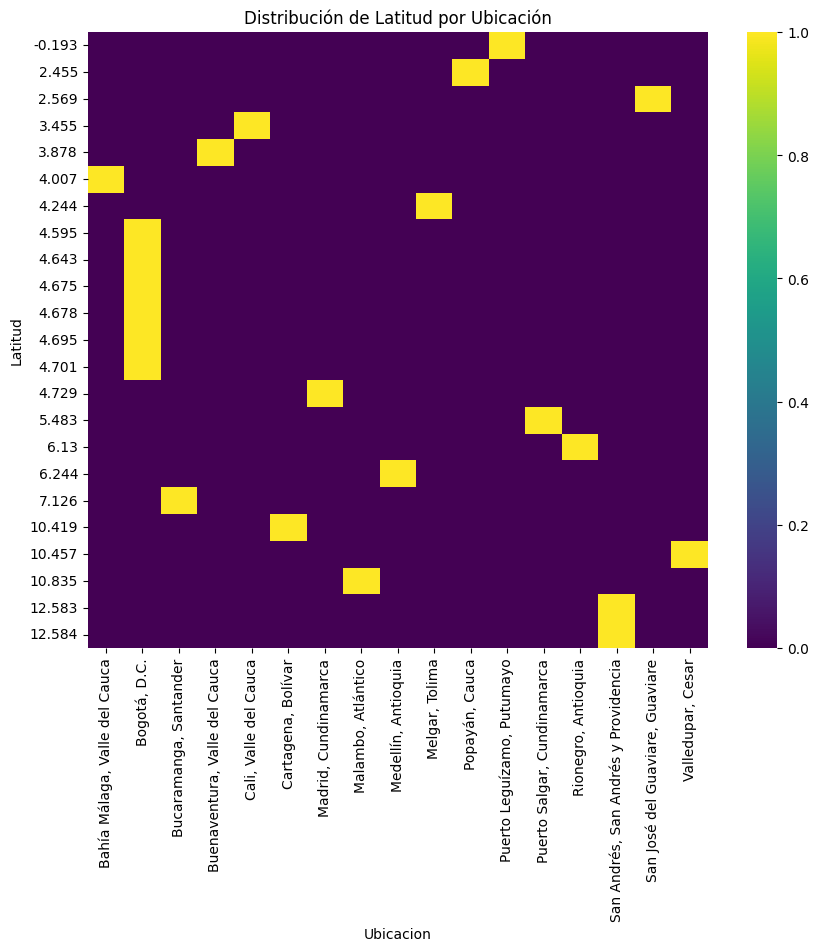

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una tabla de frecuencia limpia
df_2dhist = pd.crosstab(
    index=full_df['Latitud'],
    columns=full_df['Ubicacion']
)

# Genera el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ubicacion')
plt.ylabel('Latitud')
plt.title('Distribución de Latitud por Ubicación')
plt.show()

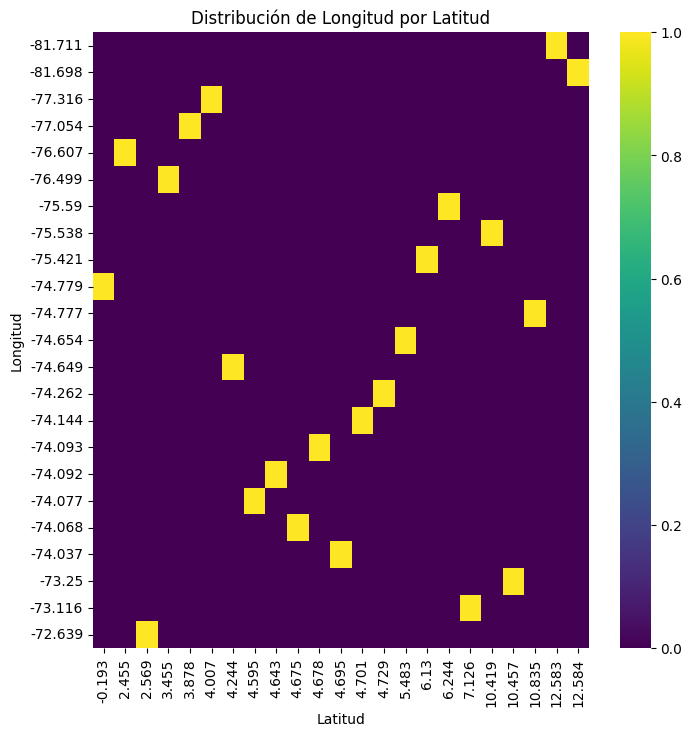

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una tabla de frecuencia limpia
df_2dhist = pd.crosstab(
    index=full_df['Longitud'],
    columns=full_df['Latitud']
)

# Genera el heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Distribución de Longitud por Latitud')
plt.show()

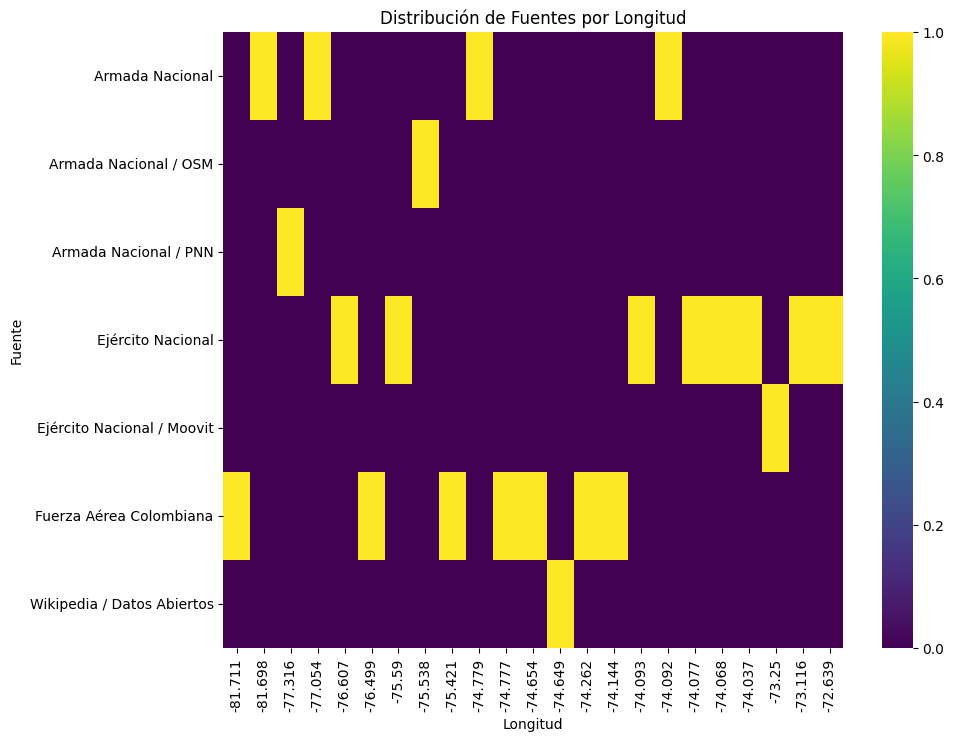

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una tabla de frecuencia limpia
df_2dhist = pd.crosstab(
    index=full_df['Fuente'],
    columns=full_df['Longitud']
)

# Genera el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Longitud')
plt.ylabel('Fuente')
plt.title('Distribución de Fuentes por Longitud')
plt.show()

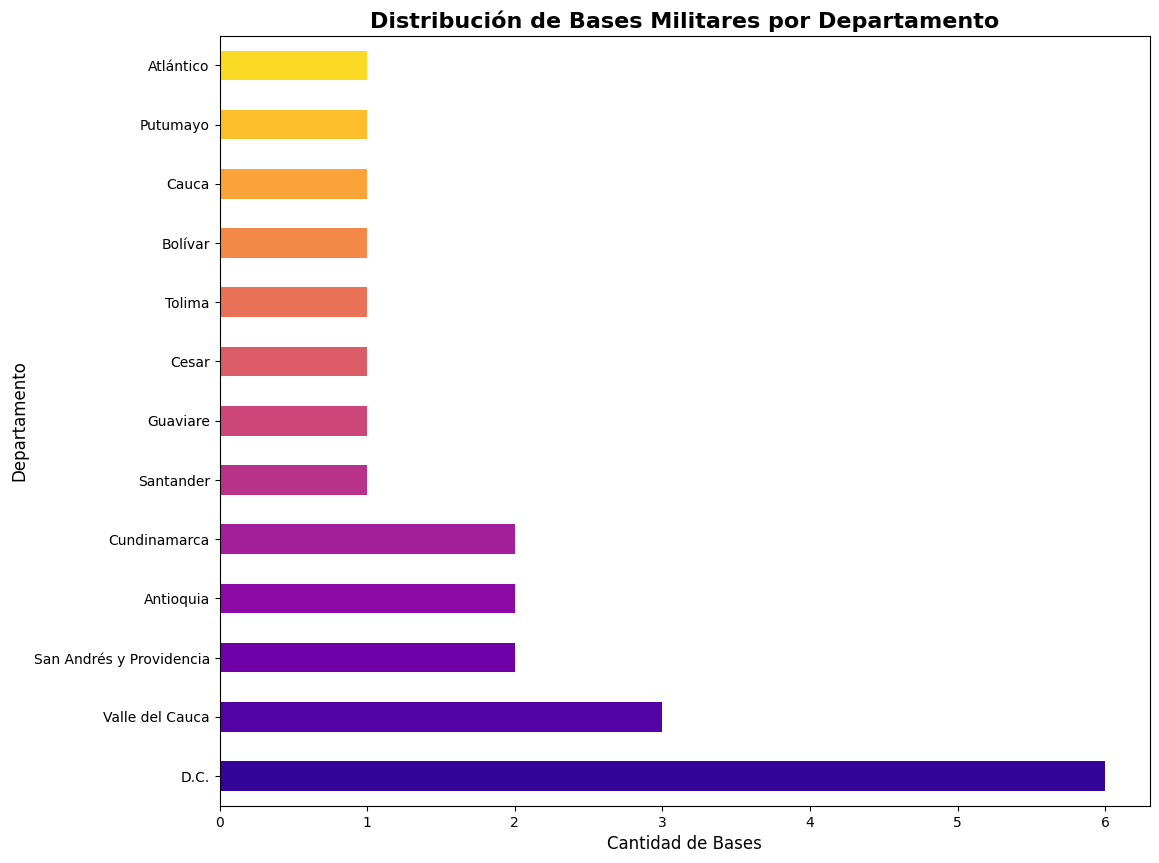

In [25]:
# Extract the department from the 'Ubicacion' column and create a new 'Departamento' column
full_df['Departamento'] = full_df['Ubicacion'].apply(lambda x: x.split(', ')[-1] if isinstance(x, str) and ', ' in x else None)

# Drop rows where Department could not be extracted
df_with_department = full_df.dropna(subset=['Departamento']).copy()

# Calculate the counts for each department
department_counts = df_with_department['Departamento'].value_counts()

# Create the figure for the plot
plt.figure(figsize=(12, 10))

# Create the bar plot using the counts
department_counts.plot(kind='barh', color=sns.color_palette('plasma', len(department_counts)))

# Add titles and labels

plt.title('Distribución de Bases Militares por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Bases', fontsize=12)
plt.ylabel('Departamento', fontsize=12)

# Show the plot
plt.show()



In [26]:
import plotly.express as px

# Nos aseguramos de no tener valores nulos en las coordenadas
df_mapa = full_df.dropna(subset=['Latitud', 'Longitud']).copy()

# Creamos el mapa interactivo
fig = px.scatter_mapbox(
    df_mapa,
    lat="Latitud",
    lon="Longitud",
    color="Fuente",  # Color de los puntos según la fuerza militar (using 'Fuente' column)
    hover_name="Unidad",  # Texto que aparece al pasar el cursor (using 'Unidad' column)
    hover_data={"Ubicacion": True, "Fuente": True}, # Información extra en el hover
    mapbox_style="carto-positron",  # Estilo de mapa limpio y claro
    zoom=4.5,  # Zoom inicial centrado en Colombia
    title="Ubicación Geográfica de Bases Militares en Colombia"
)

# Centramos el título y personalizamos la leyenda
fig.update_layout(
    legend_title_text='<b>Fuerza Militar</b>',
    title_font_size=20,
    title_x=0.5
)

# Mostramos el mapa interactivo
fig.show()